<a href="https://colab.research.google.com/github/lfr4704/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LR_LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) (Optional) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



##Solutions

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these three values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

In [1]:
#manual answer for first test
p_user = 1/1000 #prior belief 
p_pos_given_non_user = 0.08 # 8% false positive rate
p_pos_given_user = 1 #100% true positive rate
p_non_user = 1- p_user # complement of the prior belief 

#first iteration of Bayes Theorem 

numerator = p_pos_given_user * p_user #also conditional * prior
marginal = (p_pos_given_user*p_user) + (p_pos_given_non_user*p_non_user)
posterior_probability = numerator/marginal

print(f"probability that a person is drunk after one positive breathalyzer test: {posterior_probability}")


probability that a person is drunk after one positive breathalyzer test: 0.012357884330202669


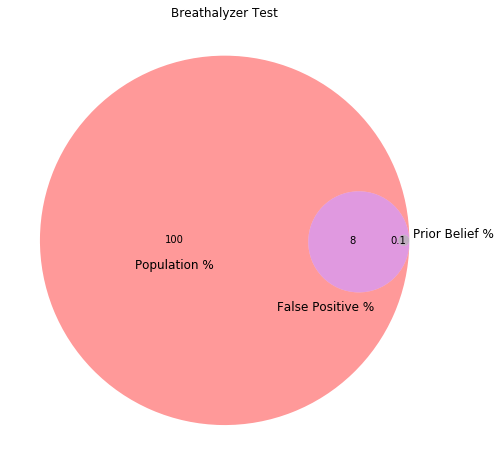

In [219]:
#imports to generate a Venn diagram (also called primary diagram, set diagram or logic diagram)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import pandas as pd

#venn diagram
plt.figure(figsize=(10,8)) #sets figure size
vd = venn3(subsets = (100,0,0,0,8,0,.1), 
      set_labels = ('Population %', 'Prior Belief %', 'False Positive %'),
      alpha=.4, normalize_to=1,ax=None, subset_label_formatter=None)
#plot title
plt.title("Breathalyzer Test")
#set label A position
lbl = vd.get_label_by_id('A')
x, y = lbl.get_position()
lbl.set_position((x+.25, y-.65))
#set label B position
lbl = vd.get_label_by_id('B')
x, y = lbl.get_position()
lbl.set_position((x+.02, y-.01))
#set label C position
lbl = vd.get_label_by_id('C')
x, y = lbl.get_position()
lbl.set_position((x-.1, y-.01))
#plot
plt.show()



#example venn diagram

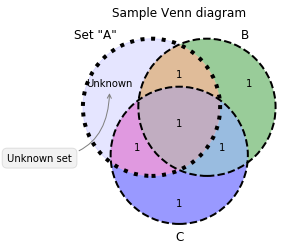

In [146]:
# example
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn3, venn3_circles
 
# Make a Basic Venn
v = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('A', 'B', 'C'))
 
# Custom it
v.get_patch_by_id('100').set_alpha(.1) #opaqueness level for uknown circle 
v.get_patch_by_id('100').set_color('blue') # unknown circle
v.get_label_by_id('100').set_text('Unknown') #sets label for unknown circle
v.get_label_by_id('A').set_text('Set "A"')
c = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1), linestyle='dashed') #copy of subsets but allows you to change linestyle around the circles
c[0].set_lw(4.0) #sets line weight of first circle, circle 2 = c[1] and circle 3 = c[2]
c[0].set_ls('dotted')
 
# Add title and annotation
plt.title("Sample Venn diagram")
plt.annotate('Unknown set', xy=v.get_label_by_id('100').get_position() - np.array([0, 0.05]), xytext=(-70,-70),
ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))
 
# Show it
plt.show()


In [3]:
# We have the same person take the test again, and they test positive again
# Now what is the probability that a person is drunk after two positive breathalyzer tests?
# The posterior probability from the first test becomes our prior for the second iteration.

p_user = posterior_probability # save posterior from first iteration as a new prior
p_non_user = 1 - p_user # calculate the complement of that prior via the law of total probability

# apply Bayes' theorem
numerator = p_pos_given_user*p_user
marginal = (p_pos_given_user*p_user) + (p_pos_given_non_user*p_non_user)
posterior_probability = numerator/marginal
print(f'probability that a person is drunk after two positive breathalyzer tests: {posterior_probability}')

probability that a person is drunk after two positive breathalyzer tests: 0.13525210993291495


#2nd breathalyzer test results

In [4]:
 
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  """this function calculates the probability 
      that a person is drunk after one positive
      breathalyzer test"""
  numerator = true_positive_rate * prob_drunk_prior
  marginal = (true_positive_rate*prob_drunk_prior) + (false_positive_rate*(1-prob_drunk_prior))
  posterior_probability = numerator/marginal
  return posterior_probability

prob_drunk_given_positive(.001,.08,1)


0.012357884330202669

#Breathelyzer function

In [5]:
def prob_drunk_given_positive_repeated(prob_drunk_prior, false_positive_rate, true_positive_rate, number_of_tests):
  """this function calculates the probability 
      that a person is drunk after a given number of positive
      breathalyzer test"""
  posterior_probability=prob_drunk_prior
  for test in range(0, number_of_tests):
    p_user = posterior_probability #prior belief
    p_non_user = 1-p_user #complement of prior belief
    p_pos_given_user = true_positive_rate #this is the true positive rate
    p_pos_given_non_user = false_positive_rate #this is the false positive rate
    posterior_probability = (p_pos_given_user*p_user)/((p_pos_given_user*p_user)+(p_pos_given_non_user*p_non_user))
  return posterior_probability

print(f'Probability after 1 test: {prob_drunk_given_positive_repeated(.001,.08,1,1)}')
print(f'Probability after 2 test: {prob_drunk_given_positive_repeated(.001,.08,1,2)}')
print(f'Probability after 3 test: {prob_drunk_given_positive_repeated(.001,.08,1,3)}')
print(f'Probability after 4 test: {prob_drunk_given_positive_repeated(.001,.08,1,4)}')

Probability after 1 test: 0.012357884330202669
Probability after 2 test: 0.13525210993291495
Probability after 3 test: 0.6615996951348605
Probability after 4 test: 0.9606895076105054


In [6]:
#How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?
def prob_drunk_given_positive_repeated(prob_drunk_prior, false_positive_rate, true_positive_rate, number_of_tests):
  """this function calculates the probability 
      that a person is drunk after a given number of positive
      breathalyzer test"""
  posterior_probability=prob_drunk_prior
  for test in range(0, number_of_tests):
    p_user = posterior_probability #prior belief
    p_non_user = 1-p_user #complement of prior belief
    p_pos_given_user = true_positive_rate #this is the true positive rate
    p_pos_given_non_user = false_positive_rate #this is the false positive rate
    posterior_probability = (p_pos_given_user*p_user)/((p_pos_given_user*p_user)+(p_pos_given_non_user*p_non_user))
    if posterior_probability >= .95:
      break
  print(f"Number of tests needed in order to have a probability that's greater than 95%: {test+1}") #adding one becuase tests starts at 0
  print(f'Posterior probability at {test+1}: {posterior_probability}')

prob_drunk_given_positive_repeated(.001,.08,1,100)


Number of tests needed in order to have a probability that's greater than 95%: 4
Posterior probability at 4: 0.9606895076105054


#2 Explore scipy.stats.bayes_mvs

In [17]:
#improt library
from scipy import stats
import pandas as pd
import numpy as np

#get data

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-02-09 23:39:16--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.2’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-02-09 23:39:17 (286 KB/s) - ‘house-votes-84.data.2’ saved [18171/18171]



In [0]:
# make into a dataframe
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

votes_df = pd.read_csv('house-votes-84.data', header=None, names = column_headers, na_values ="?")

In [5]:
#recode the votes as numberic
votes_df = votes_df.replace({'y': 1, 'n': 0})
votes_df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [6]:
votes_df = votes_df.dropna()
votes_df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
19,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [0]:
mean, var, std = stats.bayes_mvs(votes_df['water-project'])

In [10]:
print(f"Mean: {mean}")
print(f"Variance: {var}")
print(f"Standard Deviation: {std}")

Mean: Mean(statistic=0.46120689655172414, minmax=(0.4070410696033115, 0.5153727235001367))
Variance: Variance(statistic=0.2517504893841289, minmax=(0.21555367142744056, 0.29291428527052354))
Standard Deviation: Std_dev(statistic=0.5011999772680483, minmax=(0.4642775801473086, 0.5412155626647515))


In [20]:
means,_,_ = stats.bayes_mvs(votes_df['water-project'])
bmean, bmeo = means

print(f"Min Mean: {bmeo[0]}, Mean: {bmean}, Max Mean: {bmeo[1]}")


Min Mean: 0.4070410696033115, Mean: 0.46120689655172414, Max Mean: 0.5153727235001367


In [0]:
#frequenties approach? why?
def confidence_interval(data, confidence = 0.95):
    """
    Calculates a confidence interval around a sample mean for given data.
    Using t-distribution and two-tailed test, default 95% confidence. 

    @param data: Iterable. Sample observations
    @param confidence: Float, default = 0.95, confidence level for the interval
    @return: Tuple (mean, lower bound, upper bound)
    """
    data = np.array(data)
    mean = np.mean(data)
    n = len(data)
    stderr = np.std(data, ddof=1) / np.sqrt(n)
    moe = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
    return mean, mean - moe, mean + moe

In [33]:
frequentiest = confidence_interval(votes_df['water-project'], confidence=0.95)
frequentiest

(0.46120689655172414, 0.3965846075395787, 0.5258291855638696)

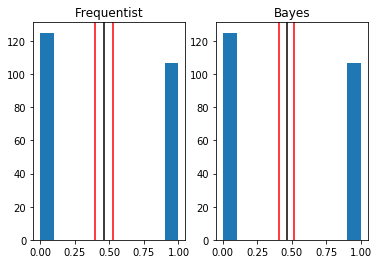

<Figure size 720x720 with 0 Axes>

In [37]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2)

fig = plt.figure(figsize=(10,10))

ax1, ax2 = ax.flatten()

ax1.hist(votes_df['water-project'])
ax1.set_title("Frequentist")
ax1.axvline(x=frequentiest[1], color='red')
ax1.axvline(x=frequentiest[0], color='k')
ax1.axvline(x=frequentiest[2], color='red')

ax2.hist(votes_df['water-project'])
ax2.set_title("Bayes")
ax2.axvline(x=bmeo[0], color='red')
ax2.axvline(x=bmeo[1], color='red')
ax2.axvline(x=bmean, color='k')
plt.show();

In [0]:
import seaborn as sns
dem_data = votes_df[votes_df['party']=="democrat"]
rep_data = votes_df[votes_df['party']=="republican"]

In [0]:
dem_data = dem_data.drop(columns="party")
rep_data = rep_data.drop(columns="party")

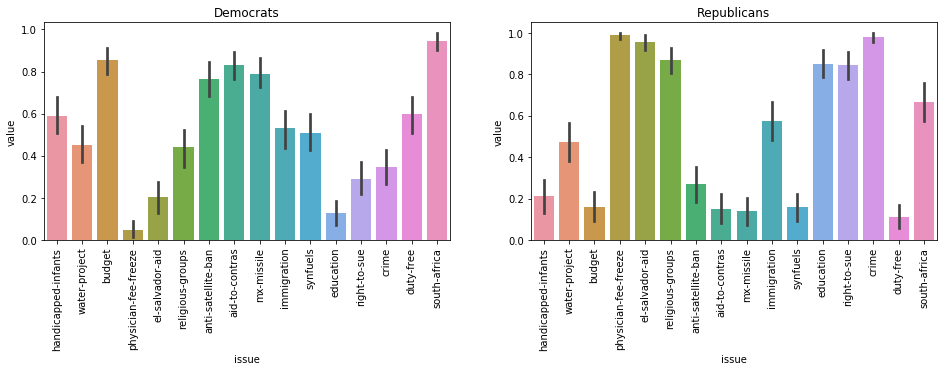

In [40]:
dem_graph = dem_data.melt(var_name="issue", value_vars=dem_data.columns)
rep_graph = rep_data.melt(var_name="issue", value_vars=rep_data.columns)

fig, ax = plt.subplots(ncols=2)
fig.set_figwidth(16)
ax1, ax2 = ax

ax1.set_title("Democrats")
sns.barplot(x="issue", y='value', data=dem_graph, estimator=np.mean, ci=95, ax=ax1)
xlabels = ax1.get_xticklabels()
for label in xlabels:
  label.set_rotation(90)

ax2.set_title("Republicans")
sns.barplot(x="issue", y="value", data=rep_graph, estimator=np.mean, ci=95, ax=ax2)
xlabels = ax2.get_xticklabels()
for label in xlabels:
  label.set_rotation(90)


#3. In your own words, summarize the difference between Bayesian and Frequentist statistics

Bayesian utilizes a prior probability to generate a postirior probability. The postior probability changes based on the prior. 

Frequentist does not need a prior probability, only depends the probability of data/hypotheses  for both observed and unobserved data.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!